In [1]:
# Logistic Regression as method of classificaton (Binary Classification)
# Some example of classification problems are as follows--
# Spam vs 'Ham' emails
# Loan default (yes/no)
# diagnosis

In [1]:
# linear regression doesnt work here but we can transform linear regression to logistic regression curve

In [1]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [7]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

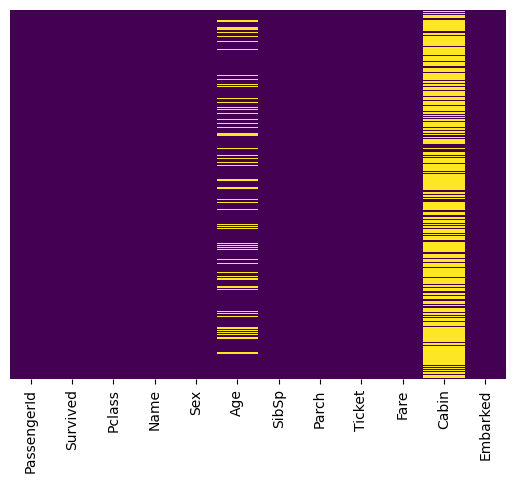

In [9]:
sbn.heatmap(train.isnull(), yticklabels = False, cbar=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

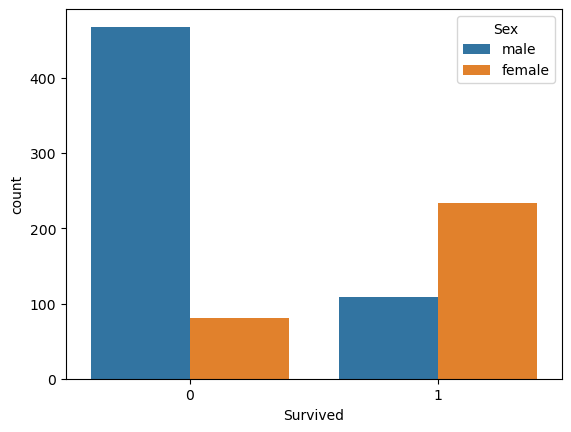

In [11]:
sbn.countplot(x='Survived', hue = 'Sex', data = train)

<Axes: xlabel='Survived', ylabel='count'>

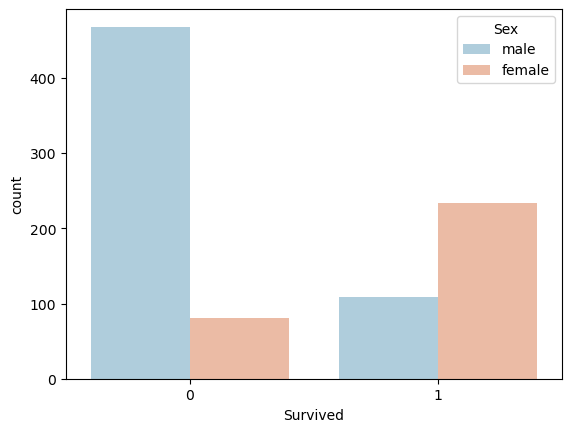

In [13]:
sbn.countplot(x='Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

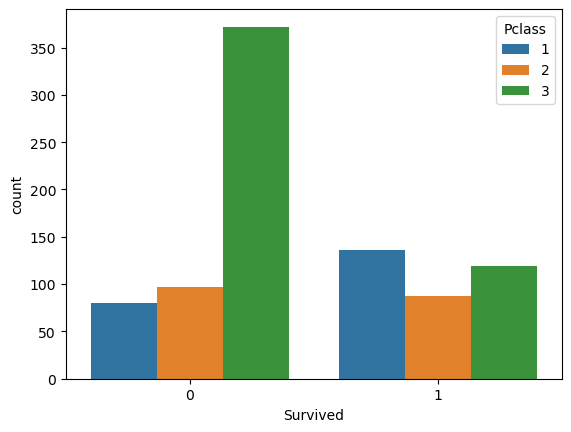

In [14]:
sbn.countplot(x='Survived', hue = 'Pclass', data = train)

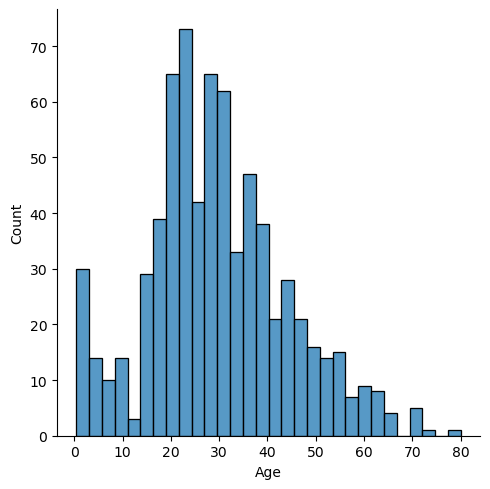

In [17]:
sbn.displot(train['Age'].dropna(), kde = False, bins = 30)

In [18]:
import cufflinks as cf
cf.go_offline()

In [19]:
train['Fare'].iplot(kind = 'hist', bins = 40)

<Axes: xlabel='Pclass', ylabel='Age'>

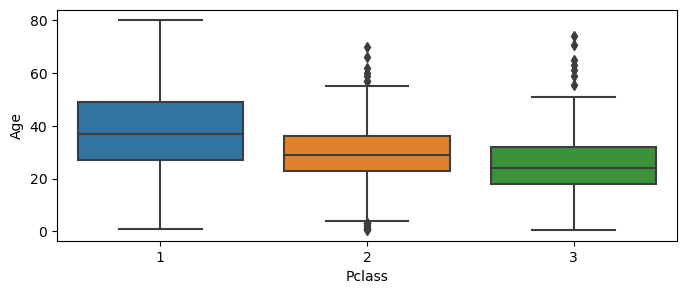

In [23]:
plt.figure(figsize = (8, 3))
sbn.boxplot(x='Pclass', y='Age', data = train)

In [27]:
def impute_age(cols) :
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age) :
        if Pclass == 1 :
            return 37
        elif Pclass == 2 : 
            return 29
        else :
            return 24
    else :
        return Age

In [28]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

<Axes: >

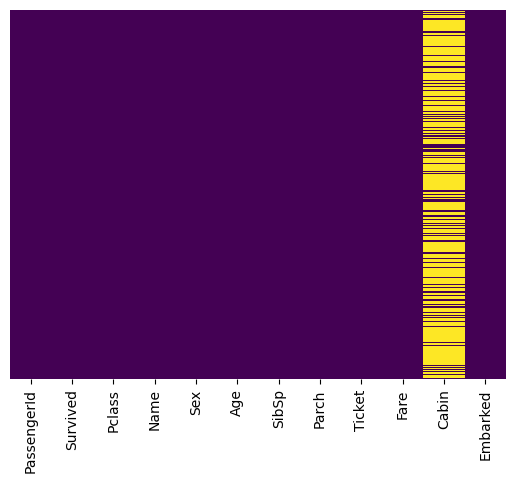

In [29]:
sbn.heatmap(train.isnull(), yticklabels = False, cbar=False, cmap='viridis')

In [30]:
train.drop('Cabin', axis = 1, inplace = True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

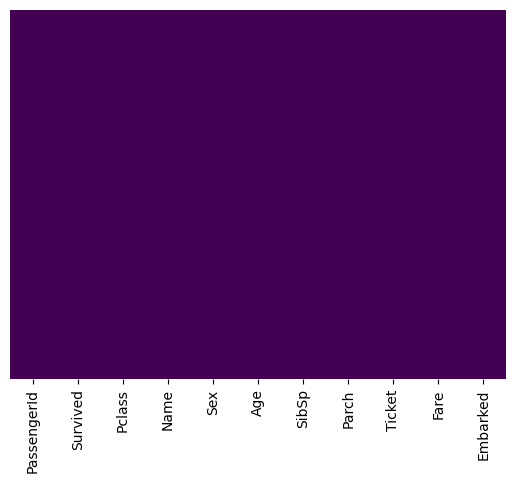

In [32]:
sbn.heatmap(train.isnull(), yticklabels = False, cbar=False, cmap='viridis')

In [35]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [36]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [39]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [40]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [41]:
train = pd.concat([train, sex, embark], axis = 1)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [44]:
train.drop(['Name', 'Sex', 'Embarked', 'Ticket'], axis = 1, inplace = True)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [49]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [51]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lg = LogisticRegression()

In [54]:
lg.fit(x_train, y_train)

C:\Users\brije\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [55]:
predictions = lg.predict(x_test)

In [57]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.77      0.63      0.70       114

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268



In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
print(confusion_matrix(y_test, predictions))

[[133  21]
 [ 42  72]]
